# Lição 5 FastAI

Nesta lição do FastAI o Jeremy ensina como fazer um modelo linear de predição, com essa ideia em mente este notebook tem como objetivo criar um modelo para prever a qualidade de um vinho, utlizando como base um Dataset do Kaggle, o Red Wine Quality de 2009.

Um modelo linear é um tipo de modelo de predição que pode ser usado para realizar classificação ou regressão. Ele é chamado de "linear" porque a relação entre as variáveis de entrada (características) e a variável de saída (alvo) é representada por uma equação linear. Os modelos lineares podem ter dificuldades em lidar com problemas que exigem uma relação não linear entre as variáveis de entrada e saída. 

Para iniciarmos devemos importar algumas bibliotecas que serão utilizadas durante o desenvolvimento. Os principais são Pandas e algumas funcionalidades do Sklearn.

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from pathlib import Path
# df = pd.read_csv('https://raw.githubusercontent.com/fastai/fastai/master/data/red-wine-quality/winequality-red.csv', delimiter=';')
path = Path('../input/red-wine-quality-cortez-et-al-2009')

Após importar o Dataset do Kaggle, podemos ver que é uma tablea pequena com apenas 12 colunas e 1599 linhas, 11 dessas colunas indicam caracteristicas do vinho como pH, densidade, etc. A coluna target que indica qual a resposta da pergunta de qual qualidade é a qualidade do vinho é a quality. 

In [2]:
df = pd.read_csv(path/'winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Para obter uma melhor descrição dos dados vamos utilizar o método describe da biblioteca pandas. Utilizando-o podemos observar que a maior parte dos dados estão dentro de uma faixa de valor aceitável, como por exemplo a coluna de Chlorides que possui um valores entre 0.01 e 0.61, ou seja não é necessário usar uma função logarítimica para tratar os dados.

Porém, podemos observar que a coluna de total sulfur dioxide possue valores muito dispersos, com 75% estando entre 6 e 62, mas o máximo em 289, portanto é necessário um tratamento dessa coluna para atenuar os valores e aumentar a capacidade de predição do modelo.

In [3]:
df.describe(include=(np.number))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Com o método hist do pandas fica mais claro essa dispersão dos dados na coluna indicada.

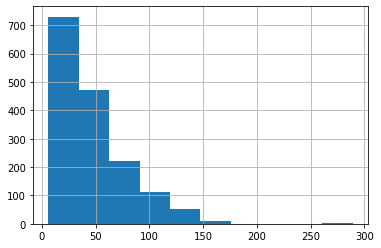

In [4]:
df['total sulfur dioxide'].hist();

Outra coluna que possui uma diferença considerável nos dados é a de free sulfur dioxide, porém ao analisar mais atentamente podemos observar que a distribuição dos dados não está tão dispersa, portanto acho interessante manter os dados originais sem fazer a aplicação de uma função logarítimica.

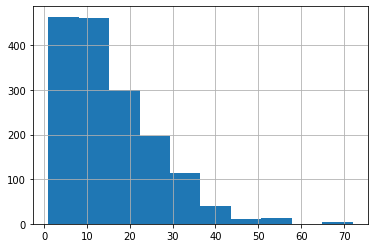

In [5]:
df['free sulfur dioxide'].hist();

Após aplicar o Log no total sulfur dioxide, podemos ver como os dados se encontram muito mais concetrados. Isso irá facilitar o treinamento, pois durante a mutiplicação de coeficientes os dados maiores não terão um peso absurdamente maior como poderia acontecer ao manter os dados originais.

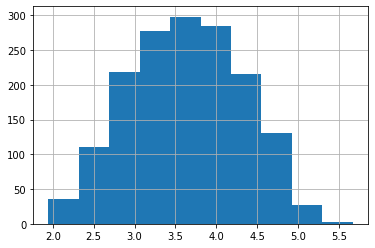

In [6]:
df['LogTotalSulfurDioxide'] = np.log(df['total sulfur dioxide']+1)
df.drop(["total sulfur dioxide"], axis=1)
df['LogTotalSulfurDioxide'].hist();

Outro importante passo para o tratamento de dados é o de eliminar dados marcados como NaN, para analisar onde deve ser feito esse tipo de tratamento iremos observar quais colunas possuem algum valor nulo.

In [7]:
df.isna().sum()

fixed acidity            0
volatile acidity         0
citric acid              0
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                  0
LogTotalSulfurDioxide    0
dtype: int64

Como podemos ver os dados da tabela oferecida pelo Kaggle não possuem nenhum valor nulo, então podemos seguir em frente.

O próximo passo é o de criar os dados de treinamento e de teste, para isso basta usar o método train_test_split que irá receber o Dataset sem a coluna target e a coluna target em si separadamente. Em seguida irá retornar os dados que serão usados no treinamento e nos testes do modelo.

In [8]:
X = df.drop(columns='quality')
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

O modelo que irei utilizar será o Random Forest Generator. O Random Forest é um algoritmo de aprendizado supervisionado que cria uma série de árvores de decisão e, em seguida, combina suas previsões para obter uma predição final mais precisa. 

**Arvore de decisão:** Uma árvore de decisão é um modelo de aprendizado de máquina que é usado para fazer previsões em problemas de classificação ou regressão. Ela funciona criando uma série de perguntas lógicas sobre os dados de entrada, onde cada pergunta é representada por um nó na árvore. A árvore é construída a partir da raiz, onde cada pergunta é feita até chegar a uma folha, que representa a previsão final.

In [9]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

data=[[7.3, 0.27, 0.3, 1.5, 0.08, 20, 50, 0.998, 3.5, 0.6, 9.5, 1.6]] 

row_df=pd.DataFrame(data,columns=['fixed acidity','volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'LogTotalSulfurDioxide'])

y_pred = model.predict(row_df)
str(y_pred[0])

'5.53'

Após treinado o modelo podemos fazer um teste com dados aleátorios e podemos ver que retorna um valor que representaria a qualidade do vinho.

Agora iremos testar com o Dataset teste criado, isso irá permitir uma melhor interpretação da qualidade do modelo criado.

In [10]:
y_pred = model.predict(X_test)
y_pred

array([5.22, 5.21, 5.46, 5.16, 5.98, 5.03, 5.1 , 4.92, 6.19, 6.04, 6.72,
       5.35, 5.77, 5.27, 5.47, 6.36, 5.34, 5.79, 6.87, 5.1 , 4.96, 5.8 ,
       5.4 , 5.87, 5.68, 5.94, 6.38, 5.2 , 5.28, 5.98, 5.33, 5.47, 5.81,
       5.58, 5.83, 5.13, 6.27, 6.  , 5.32, 6.02, 5.23, 5.17, 6.23, 5.03,
       5.57, 5.64, 6.47, 5.66, 5.13, 5.74, 5.13, 5.42, 5.29, 7.  , 5.27,
       5.62, 6.03, 5.96, 5.71, 5.  , 5.61, 6.3 , 5.5 , 5.32, 6.64, 5.4 ,
       6.67, 5.67, 6.59, 5.42, 6.08, 5.15, 5.77, 5.59, 6.03, 5.06, 6.4 ,
       5.16, 6.06, 6.55, 5.11, 6.89, 5.2 , 5.67, 5.88, 6.49, 5.  , 6.03,
       6.6 , 5.39, 6.43, 5.57, 4.96, 5.17, 5.19, 5.42, 5.12, 5.89, 4.48,
       5.49, 5.16, 5.11, 5.74, 6.51, 5.36, 6.67, 5.77, 5.24, 5.25, 5.3 ,
       6.35, 5.03, 6.5 , 5.03, 5.22, 6.14, 5.43, 5.26, 5.03, 5.83, 6.07,
       5.69, 5.95, 5.37, 5.71, 5.13, 6.31, 5.47, 5.27, 5.61, 5.77, 5.34,
       5.01, 6.3 , 5.74, 5.04, 4.98, 5.46, 5.1 , 5.78, 6.59, 6.35, 6.52,
       5.34, 5.55, 5.1 , 5.61, 5.67, 5.51, 5.07, 5.

Após utilizado os dados de teste para fazer as suas predições podemos verificar o error do modelo nesses dados, para isso será utilizado o y_test, o y_pred para encontrar o mean squared error. Ele faz isso comparando os valores reais (y_test), dos valores previstos (y_pred). 

A escolha do MSE ao invés do MAE foi pelo fato do MSE conseguir descrever melhor os dados, apesar de ser mais sensível a grandes variações de dados que o MAE, o MSE consegue demonstrar de maneira mais simples o comportamento do modelo, e como o DataSet utilizado não possue variações muito grandes dos dados acredito que irá se encaixar melhor no meu modelo. 

In [11]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 0.31


Podemos ver que com o MAE o erro cresce significamente, acredito que isso seja pelo fato dos erros não serem interpretados da maneira adequada, sendo feita um média, portanto valores muito extremos não afetam tanto essa métrica. Como o Dataset utilizado não possue valores extremos acredito que o MAE não seria a melhor forma de avaliar o modelo.

In [12]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 0.42


Para finalizar devemos subir o modelo para o Hugginfaces, primeiramente devemos criar o pickle do modelo, uma vez feito isso basta baixar o arquivo e subir manualmente para o hugginfaces, o espaço está disponível na seguinte URL: https://huggingface.co/spaces/DanielViniciusAlves/AM_Lesson_3

In [13]:
import pickle

# Carregar o modelo treinado
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)